Machine Learning é algo que faz você questionar a vida, porque é preciso analisar dados e o sistema que vai criar as próprias regras ou perguntas... O bicho é rebelde. 
Pra trabalhar com esses dados, é preciso selecionar e transformar variáveis, esses dados são trabalhados pra predizer algo e no nosso caso, vamos utilizar o método de agrupamento, que é uma coleção de objetos de dados que são similares dentro de um grupo.

Vamos fazer alguns imports pra conseguir rodar a ~tr3t4~.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
%matplotlib inline
data = pd.read_csv("./adult.csv", index_col=0)

In [55]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
# data = data.drop('workclass', 1)
# data = data.drop('fnlwgt', 1)
# data = data.drop('education', 1)
# data = data.drop('education_num', 1)
# data = data.drop('marital_status', 1)
# data = data.drop('occupation', 1)
# data = data.drop('relationship', 1)
# data = data.drop('capital_gain', 1)
# data = data.drop('capital_loss', 1)

data.drop(['workclass', 'fnlwgt', 'occupation', 'education_num', 'marital_status', 'relationship', 'capital_gain', 'capital_loss' ], axis=1, inplace=True)


No caso dos dados acima, nós removemos algumas colunas, pra facilitar um pouco a nossa vida.

In [57]:
data

,age,education,race,sex,hours_per_week,native_country,income
1,39,Bachelors,White,Male,40,United-States,<=50K
2,50,Bachelors,White,Male,13,United-States,<=50K
3,38,HS-grad,White,Male,40,United-States,<=50K
4,53,11th,Black,Male,40,United-States,<=50K
5,28,Bachelors,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...
32557,27,Assoc-acdm,White,Female,38,United-States,<=50K
32558,40,HS-grad,White,Male,40,United-States,>50K
32559,58,HS-grad,White,Female,40,United-States,<=50K
32560,22,HS-grad,White,Male,20,United-States,<=50K


Olha o shape dele, cheio de dimensões:

In [58]:
data.shape

(32561, 7)

    Vamos analisar quantos dados existem com foco na renda, educação, raça e sexo.

In [59]:
data[["income", 'education', 'race', 'sex']].value_counts()

income  education      race                 sex    
 <=50K   HS-grad        White                Male      4893
         Some-college   White                Male      2857
         HS-grad        White                Female    2469
         Some-college   White                Female    2095
 >50K    Bachelors      White                Male      1727
                                                       ... 
         5th-6th        Other                Male         1
         7th-8th        White                Female       1
         9th            Asian-Pac-Islander   Female       1
         Assoc-acdm     Amer-Indian-Eskimo   Female       1
         Prof-school    Amer-Indian-Eskimo   Female       1
Length: 248, dtype: int64

Aqui conseguimos ter uma análise de como a renda de mais de 50 mil é pra quem tem estudo superior, branco, do sexo masculino.

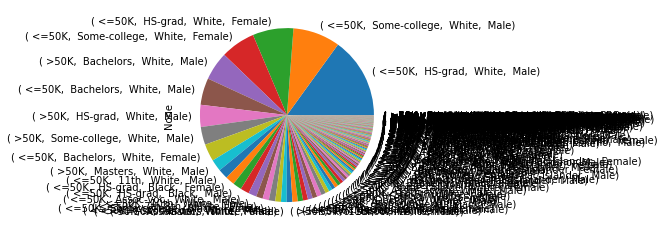

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
data[["income", 'education', 'race', 'sex']].value_counts().plot(kind='pie');

Aqui podemos ter uma noção, meio bagunçada mas mais visível, de um panorama sobre quem ganha mais de 50 mil e quem ganha menos, nos baseando em renda, ediucação, raça e sexo.

In [61]:
data["income"].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

Como na maioria das vezes machine learning só aceita números, precisamos converter alguns valores. Essas coisas acabam sendo beeeem sacanas com você... Mas não levamos pro pessoal.

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

data = data.apply(le.fit_transform)

In [63]:
data

,age,education,race,sex,hours_per_week,native_country,income
1,22,9,4,1,39,39,0
2,33,9,4,1,12,39,0
3,21,11,4,1,39,39,0
4,36,1,2,1,39,39,0
5,11,9,2,0,39,5,0
...,...,...,...,...,...,...,...
32557,10,7,4,0,37,39,0
32558,23,11,4,1,39,39,1
32559,41,11,4,0,39,39,0
32560,5,11,4,1,19,39,0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = data.drop(columns="income").values 
y = data['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

model = LogisticRegression().fit(x_train, y_train)

y_pred = model.predict(x_test)

In [65]:
x_test

array([[10, 15,  4,  0, 37, 39],
       [28, 11,  4,  0, 39, 39],
       [12,  9,  2,  1, 54, 39],
       ...,
       [ 7, 11,  4,  1, 39, 39],
       [39, 15,  4,  1, 39, 39],
       [27,  9,  4,  1, 39, 39]])

Logo abaixo tem algumas predições da acurácia, que verifica qual o tipo de erro, se a gente disse que ganha mais e ganhava menos ou o contrário.

In [71]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [72]:
list(y_pred[:20])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [73]:
list(y_test[:20])

[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]

In [74]:
pd.DataFrame({'pred': y_pred, 'resp': y_test})

,pred,resp
14161,0,0
27049,0,0
28869,0,1
5668,0,0
7828,0,0
...,...,...
32477,1,0
21101,0,0
27132,0,0
25527,1,1


A matriz de confusão tenta entender as possíveis confusões que o modelo faz, se a linha e a coluna dizem o que é esperado e o que eu disse. Qual a resposta esperada? O que eu disse que realmente era o correto?
Também é importante tomar cuidado com falsos positivos e falsos negativos, mas não sei se estamos prontos pra essa conversa ainda...

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7057,  398],
       [1893,  421]])

In [79]:
data_select = data.sample(500)
data_select.head()

,age,education,race,sex,hours_per_week,native_country,income
22413,34,11,4,1,49,39,0
1891,51,11,4,1,44,39,0
13303,10,4,4,0,39,26,0
29322,19,11,4,0,34,39,0
16500,52,11,4,1,9,39,0


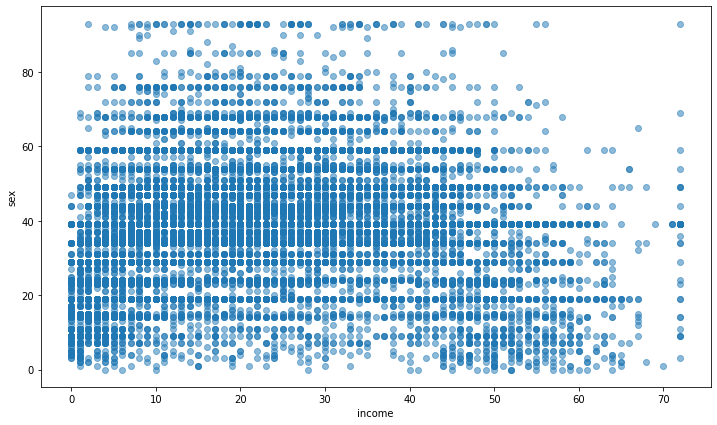

In [80]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.scatter(data.age, data.hours_per_week, alpha=0.5)
plt.xlabel('income')
plt.ylabel('sex')
plt.show()

Quando trabalhamos com dimensões, precisamos verificar onde esses dados estão nesse espaço e como esses dados se associam, quem tá mais perto de quem, quanto mais perto mais em comum esses dados tem (ou quase).
O mais famoso por partição é o k-means, a ideia é que ele comece o agrupamento, definindo o número de clustes. Cada cluster tem um centroide, que é responsável por representar esse grupo.

In [81]:
kmeans = KMeans(random_state=0).fit(data_select)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(data_select)

In [82]:
centroides

array([[2.32812500e+01, 9.92968750e+00, 3.64843750e+00, 7.42187500e-01,
        4.02578125e+01, 3.81875000e+01, 3.82812500e-01],
       [4.54716981e+00, 9.60377358e+00, 3.60377358e+00, 4.52830189e-01,
        1.94339623e+01, 3.86226415e+01, 1.88679245e-02],
       [3.91641791e+01, 9.74626866e+00, 3.74626866e+00, 6.56716418e-01,
        3.82388060e+01, 3.81940299e+01, 2.98507463e-01],
       [3.42195122e+01, 1.07804878e+01, 3.82926829e+00, 8.78048780e-01,
        5.39756098e+01, 3.84390244e+01, 4.14634146e-01],
       [1.90000000e+01, 9.62500000e+00, 3.45833333e+00, 7.50000000e-01,
        3.91666667e+01, 6.29166667e+00, 2.08333333e-01],
       [1.44324324e+01, 1.02972973e+01, 3.64864865e+00, 8.10810811e-01,
        6.18378378e+01, 3.78378378e+01, 2.70270270e-01],
       [9.93233083e+00, 1.03609023e+01, 3.60902256e+00, 6.24060150e-01,
        4.00000000e+01, 3.86090226e+01, 8.27067669e-02],
       [4.29411765e+01, 9.29411765e+00, 3.76470588e+00, 5.88235294e-01,
        1.42941176e+01, 3

É preciso também fazer cálculo da distância de cada centróide para os objeto, sendo associado ao centróide mais próximo.

In [85]:
pd.Series(y_kmeans).value_counts()

6    133
0    128
2     67
1     53
3     41
5     37
4     24
7     17
dtype: int64

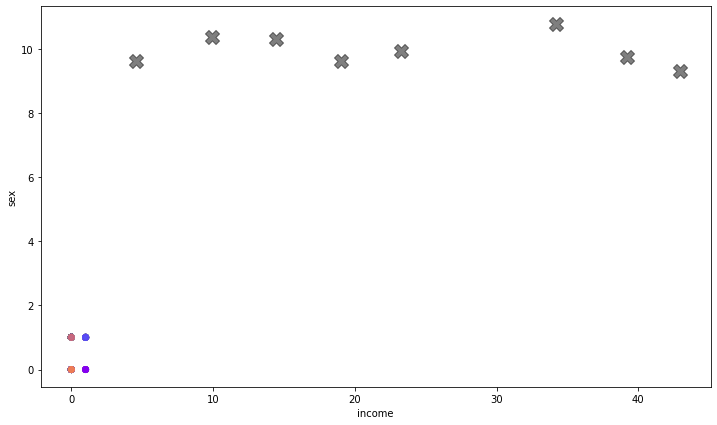

In [87]:
plt.scatter(data_select.income, data_select.sex, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('income')
plt.ylabel('sex')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

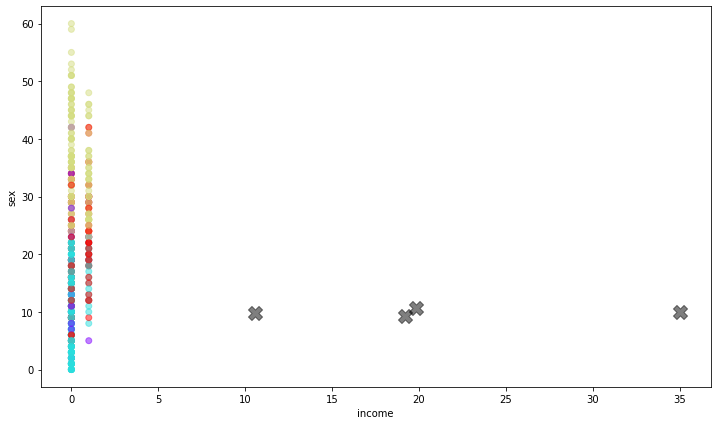

In [88]:
kmeans = KMeans(n_clusters=4, random_state=100) 
kmeans.fit(data_select)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(data_select)

plt.scatter(data_select.income, data_select.age, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('income')
plt.ylabel('sex')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

Aí você vai "rodando, rodando", até que os centróides fiquem mais no meio possível, o ideal é que os objetos não mudem mais de cluster/grupo.
É preciso tomar cuidado ao definir o lugar do centróides porque alguns podem ficar muito longe, outros pertos demais e acaba prejudicando o modelo.
Pra gente medir as distâncias, podemos usar linha reta ou a linha Manhattan, que percorre a distância como se fossem em ruas, tem a coseno que mede o ângulo e a euclidiana que faz a divisão em linha reta, separando os dados, tipo meio a meio.
Ou seja, existem vários jeitos de se calcular essas distâncias.

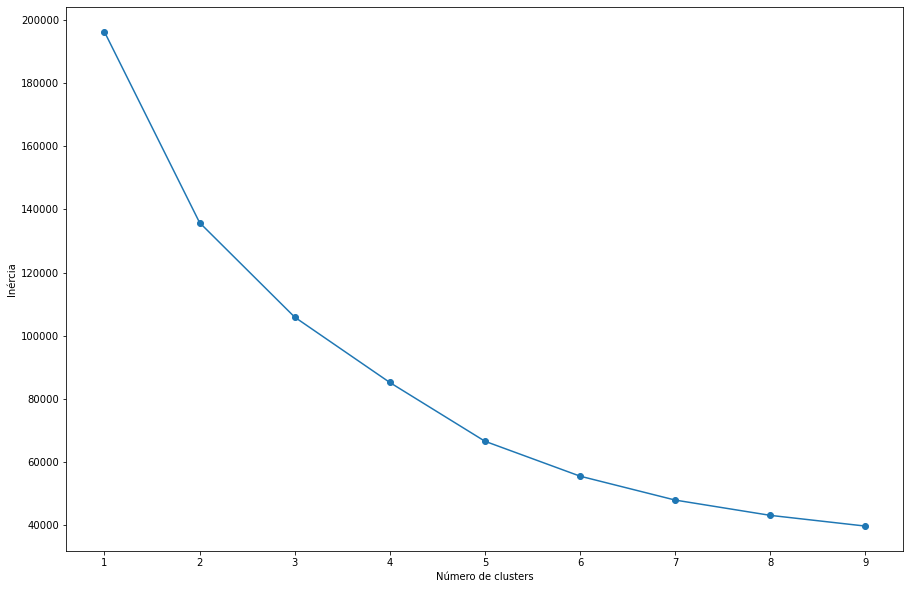

In [89]:
k = list(range(1, 10))

inercia = []

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_select)
    inercia.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 10)

plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Quando não temos noção pré-determinada, podemos usar o método do cotovelo, que é baseado na ideia da inércia baixa, vendo onde existe mais inércia, que é onde vale mais a pena iniciar um centróide. Nesse caso, no máximo uns 3 ou 4 centróides.

In [27]:
inercia

[192810.12199999992,
 130267.31432411676,
 101788.08922991551,
 85159.47278950005,
 69251.21713953113,
 54487.660509590336,
 44798.905938699536,
 40982.93224232929,
 37646.75316375482]

In [28]:
data_select.head()

,age,education,race,sex,hours_per_week,native_country,income
31210,18,8,4,1,39,39,0
15050,10,12,4,1,39,39,0
16788,0,1,4,1,29,39,0
9949,24,11,4,1,9,39,0
23308,15,9,1,0,39,39,0


In [31]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data)
clusters

array([0, 2, 0, ..., 2, 0, 2], dtype=int32)

In [32]:
pd.Series(clusters).value_counts()

0    15502
2    10772
1     6287
dtype: int64

In [33]:
data.columns

Index(['age', 'education', 'race', 'sex', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

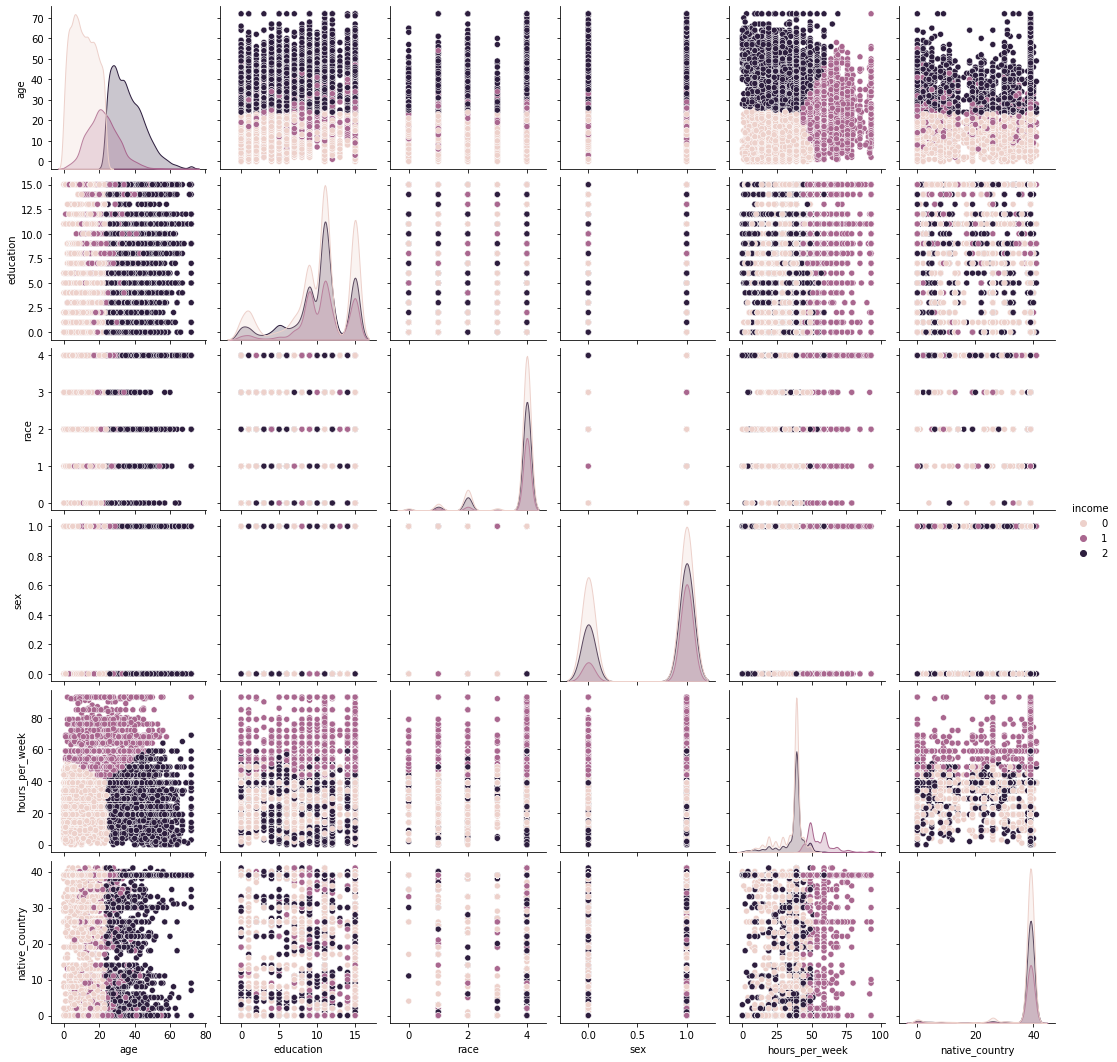

In [34]:
data_clustered = data.copy()
data_clustered['income'] = clusters
sns.pairplot(data_clustered[['age', 'education', 'race', 'sex', 'hours_per_week', 'native_country',
       'income']], 
             hue='income');

In [35]:
# Silhoutte

In [36]:
silhouette_score(data, clusters)

0.31754628198726287

In [37]:
silhouette_values = silhouette_samples(data, clusters)
len(silhouette_values)

32561

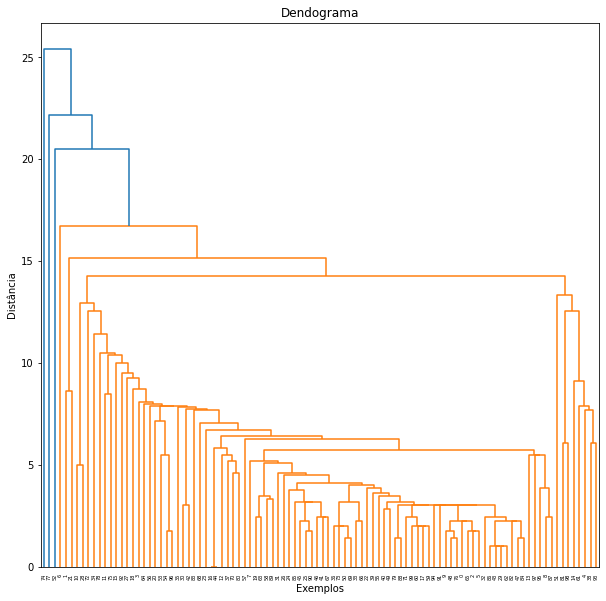

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
h_cluster = linkage(data, method='single', metric='euclidean')

h_cluster_100 = linkage(data.iloc[:100], method='single', metric='euclidean')
plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Dendograma')
plt.xlabel('Exemplos')
plt.ylabel('Distância')
dendrogram(h_cluster_100)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering().fit(data)
clusters = model.labels_

In [ ]:
model.n_clusters_

In [ ]:
silhouette_score(data, clusters)

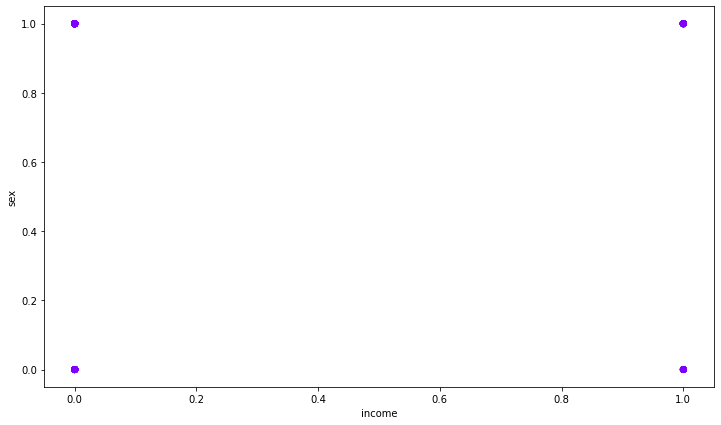

In [42]:
from sklearn.cluster import DBSCAN
clusters_dbscan = DBSCAN(eps=2, min_samples=50).fit_predict(data_select)
plt.rcParams['figure.figsize'] = (12, 7)
plt.scatter(data_select.income, data_select.sex, c=clusters_dbscan, alpha=0.5, 
            cmap='rainbow')
plt.xlabel('income')
plt.ylabel('sex')
plt.show()

In [43]:
clusters_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

O silhouette ajuda a gente a saber que quanto mais próximo do centróide, maior o silhouette e conseguimos fazer uma média geral, que o ideal é ficar próxima de 1, porque a chance do elemento pertencer aquele grupo é maior.

O que precisamos entender é que números também podem ser trabalhados como categorias e que é preciso separar o dado de teste e o dado de treino e que podemos usar vários métodos pra cruzar informações que melhorem a confiabilidade do modelo e sempre ficar de olho se o modelo tá acertando ao invés de decorando.